# Predicting breast cancer tumor type: Benign or malignant

Apply a:
- linear classifier, `SVC(kernel='linear')`  
- non-linear classifier, `RandomForestClassifier(random_state=82)` 

to the Wisconsin breast cancer dataset.

The data is hosted on UCI https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

we will need `wdbc.names` and `wdbc.data` from the data folder on UCI.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Download the data

<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        add base url and filenames. 
    </p>
</div>

In [2]:
import os
import requests

#TODO: add base url and filenames
base_url = ...
file_names = [..., ...] # .names then .data

for file_name in file_names:
    if not os.path.isfile(file_name):
        print(f"Downloading {file_name} from {base_url}")
        response = requests.get(base_url+file_name)
        with open(file_name, 'wb') as f:
            f.write(response.content)
    else:
        print(f"{file_name} found on disk")

wdbc.names found on disk
wdbc.data found on disk


# 2. Prepare the data
## 2.1 A look at the data files

In [3]:
with open(file_names[0]) as f:
    print(f.read())

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

### Data set summary
### Question 1: In the dataset, which columns are features, which column is the target?
From the dataset desciption above, summarize how many features we have and what their column names are. State which column is the target, the values we would like to predict.

Note, we will ignore the patient ID column and only consider columns 1-12.

<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        answer question below. 
    </p>
</div>




*ADD dataset summary*

### The data 

In [4]:
with open(file_names[1]) as f:
    for _ in range(10):
        print(f.readline(), end="")

842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.017

## 2.2 Loading the data with Pandas

See `pandas.ipynb` for more information on the pandas python library.

<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        add the names of the 12 columns as a list to the names parameter. 
    </p>
</div>

In [5]:
#TODO: add the names of the 12 columns as a list to the names parameter
data = pd.read_csv( 'wdbc.data',  
                   index_col=False,
                   names=[ ... ])
data.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius             569 non-null    float64
 3   texture            569 non-null    float64
 4   perimeter          569 non-null    float64
 5   area               569 non-null    float64
 6   smoothness         569 non-null    float64
 7   compactness        569 non-null    float64
 8   concavity          569 non-null    float64
 9   concave_points     569 non-null    float64
 10  symmetry           569 non-null    float64
 11  fractal_dimension  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB


In [7]:
data.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [8]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### renaming values in `'diagnosis'` column

<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        change 'B' to 'benign' and 'M' to 'malginant'. 
    </p>
</div>

In [9]:
#TODO: change 'B' to 'benign' and 'M' to 'malginant'
...

In [10]:
data['diagnosis'].value_counts()

benign       357
malignant    212
Name: diagnosis, dtype: int64

## 2.3 Getting an overview by visualizing the data

See `visualization.ipynb` for more information on plotting in python.

### Comparing healthy and diseased feature values
<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        create sns.histplot() for all columns in data except id and diagnosis. 
    </p>
</div>

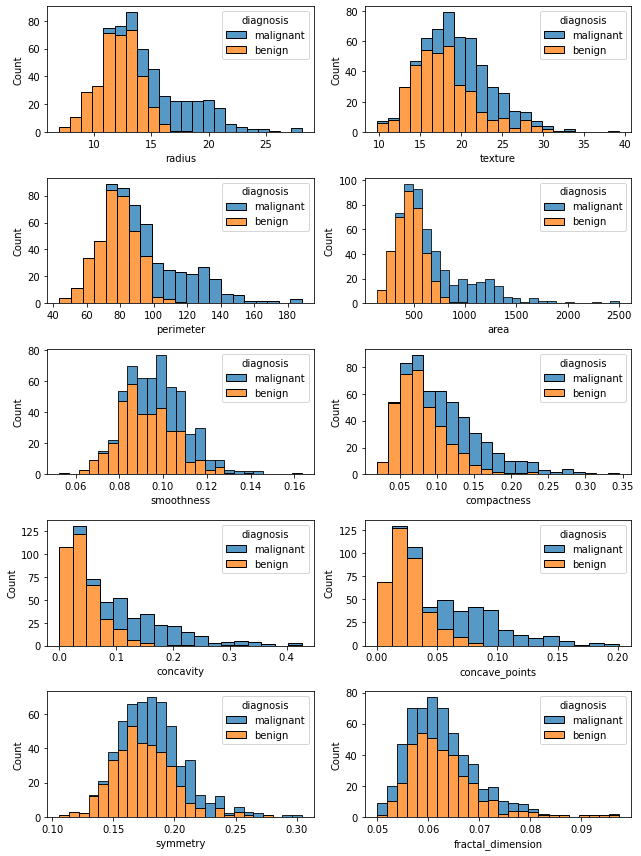

In [11]:
#TODO: create sns.histplot() for all columns in data except id and diagnosis

    
plt.tight_layout()

### Pair-wise correlations of numerical features
<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        Create sns.pairplot() for columns 'radius', 'area', 'concavity', 'symmetry' in data using 'diagnosis' as hue. 
    </p>
</div>

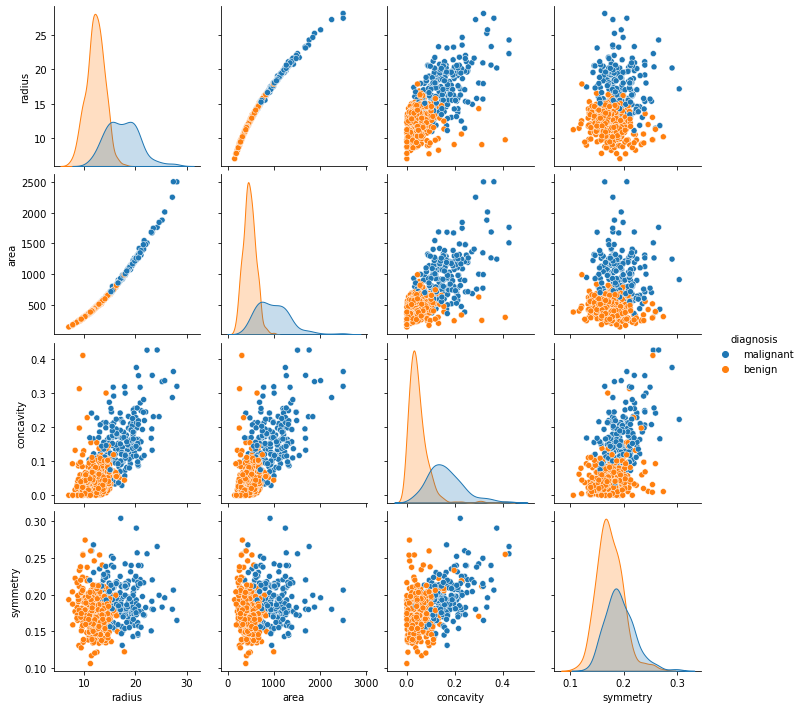

In [12]:
#TODO: Create sns.pairplot() for columns 'radius', 'area', 'concavity', 'symmetry' in data using 'diagnosis' as hue



## 2.4 Create feature matrix and target vector 
The feature matrix $X$ is the input to the model.  
The target vector $y$ contains the values the model should produce, the desired output.  

See [Python Data Science Handbook 05.02-Introducing-Scikit-Learn](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.02-Introducing-Scikit-Learn.ipynb) for more information.

<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        use all columns except id and diagnosis for feature matrix X. 
    </p>
    <p>
        assign diagnosis column to target vector y
    </p>
</div>

In [13]:
#TODO: use all columns except id and diagnosis for feature matrix X
X = ...
#TODO: assign diagnosis column to target vector y
y = ...
print(f"feature matrix X shape={X.shape}")
print(f"target vector y shape={y.shape}")

feature matrix X shape=(569, 10)
target vector y shape=(569,)


## 2.5 Create training and validation sets

We split the data into two sets:
1. Training set - used to create the machine learning model
1. Validation set - used to evaluate model performance


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=31)

print(f"train shape={X_train.shape}")
print(f"val shape={X_val.shape}")

train shape=(512, 10)
val shape=(57, 10)


In [15]:
print("training samples:")
y_train.value_counts()

training samples:


benign       321
malignant    191
Name: diagnosis, dtype: int64

In [16]:
print("validation samples:")
y_val.value_counts()

validation samples:


benign       36
malignant    21
Name: diagnosis, dtype: int64

# 3. Machine learning: Supervised classification
## 3.1 Train a linear support vector classifier `SVC(kernel='linear')` 

See [Python Data Science Handbook 05.07-Support-Vector-Machines](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb) for more information on linear support vector classifiers.

In [17]:
from sklearn.svm import SVC

model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)

SVC(kernel='linear')

## 3.2 Compare training and validation accuracy

**Important:** We assess the performance of the model on data the model has not seen yet. This set of data is called the *validation* set. The data used to create the model is used the *training* set.


See [Python Data Science Handbook 05.03-Hyperparameters-and-Model-Validation](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb) for more information on interpreting model performance

In [18]:
print(f"{model_svc} training accuracy={model_svc.score(X_train, y_train):.2f}")

SVC(kernel='linear') training accuracy=0.92


In [19]:
print(f"{model_svc} validation accuracy={model_svc.score(X_val, y_val):.2f}")

SVC(kernel='linear') validation accuracy=0.89


### Question 2: SVC - Are we over or underfitting? 
We are over-/under-fitting. We need more/less regularization and a higher/lower `C`. We will try `C=0.01`/`C=100` next.
<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        answer question below. 
    </p>
</div>


*ANSWER QUESTION HERE*

<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        Re-train the model based on your answer. 
    </p>
</div>

In [20]:
#TODO Re-train the model based on your answer


print(f"{model_svc} training accuracy={model_svc.score(X_train, y_train):.2f}")
print(f"{model_svc} validation accuracy={model_svc.score(X_val, y_val):.2f}")

SVC(C=100, kernel='linear') training accuracy=0.93
SVC(C=100, kernel='linear') validation accuracy=0.93


Nice increase in accuracy.

## 3.3 Train a non-linear random forest classifier `RandomForestClassifier(random_state=82)` 

See [Python Data Science Handbook 05.08-Random-Forests](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb) for more information on random forest classifiers.


In [21]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=82)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=82)

## 3.4 Compare training and validation accuracy

**Important:** We assess the performance of the model on data the model has not seen yet. This set of data is called the *validation* set. The data used to create the model is used the *training* set.


See [Python Data Science Handbook 05.03-Hyperparameters-and-Model-Validation](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb) for more information on interpreting model performance

In [22]:
print(f"{model_rf} training accuracy={model_rf.score(X_train, y_train):.2f}")

RandomForestClassifier(random_state=82) training accuracy=1.00


In [23]:
print(f"{model_rf} validation accuracy={model_rf.score(X_val, y_val):.2f}")

RandomForestClassifier(random_state=82) validation accuracy=0.89


### Question 3: RandomForest - Are we over or underfitting? 
We are over-/under-fitting. We need more/less regularization and adjust/not adjust `max_depth` or adjust/not adjust `max_features`. We will try `max_depth=3`/`max_features=None` next.
<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        answer question below. 
    </p>
</div>


*ANSWER QUESTION HERE*

<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        Re-train the model based on your answer. 
    </p>
</div>

In [24]:
#TODO: Re-train the model based on your answer


print(f"{model_rf} training accuracy={model_rf.score(X_train, y_train):.2f}")
print(f"{model_rf} validation accuracy={model_rf.score(X_val, y_val):.2f}")

RandomForestClassifier(max_depth=3, random_state=82) training accuracy=0.96
RandomForestClassifier(max_depth=3, random_state=82) validation accuracy=0.91


This helped a little bit.

## 3.5 The confusion matrix 

More information on [wikipedia confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)



### Using the svc model from step 3.2

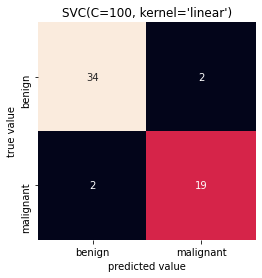

In [25]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_val, model_svc.predict(X_val))


labels = ['benign', 'malignant']

sns.heatmap(mat, square=True, annot=True, cbar=False, 
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title(f'{model_svc}');

### Using the random forest model from step 3.4

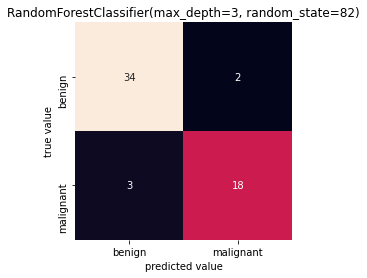

In [26]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_val, model_rf.predict(X_val))


labels = ['benign', 'malignant']

sns.heatmap(mat, square=True, annot=True, cbar=False, 
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title(f'{model_rf}');

### Question 4: What kind of errors do SVC and RandomForest make?
Based on the confusion matrices above, summarize false positives and false negatives of SVC and RandomForest make? 
<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        answer question below. 
    </p>
</div>


*ANSWER QUESTION HERE*

## 3.6 Summarize the different scores 

In [27]:
print(f'--- {model_svc} ---')
print('training accuracy (all data) {:.3f}'.format(model_svc.score(X_train, y_train)))
print('validation accuracy (new data) {:.3f}'.format(model_svc.score(X_val, y_val)))

print(f'--- {model_rf} ---')
print('training accuracy (all data) {:.3f}'.format(model_rf.score(X_train, y_train)))
print('validation accuracy (new data) {:.3f}'.format(model_rf.score(X_val, y_val)))

--- SVC(C=100, kernel='linear') ---
training accuracy (all data) 0.926
validation accuracy (new data) 0.930
--- RandomForestClassifier(max_depth=3, random_state=82) ---
training accuracy (all data) 0.965
validation accuracy (new data) 0.912


### Question 5: Which model, SVC or RandomForest would you choose?
Based on training and validation accuracies, and your analysis of the confusion matrices, which model, SVC or RandomForest would you choose and why? 
<div class="alert alert-block alert-warning">
    <b>TODO:</b>
    <p>
        answer question below. 
    </p>
</div>


*ANSWER QUESTION HERE*